In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import warnings

from lib.pipelines import boosting_pipeline
from lib.utils import merge_item_cat_preds, calc_merged_metrics

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Best item model

Candidates generation...
Candidates sampling...
Pos and neg candidates generation...
Adding features...
Fitting boosting...
19 features
Index(['category_id_le', 'uom_le', 'packing_size', 'price_uom', 'ltv_turnover',
       'ltv_quantity', 'ltv_check_count', 'ltv_purch_date_count',
       'ltv_item_count', 'check_av_turn', 'check_av_quintity', 'check_av_item',
       'frequence_client_per_month', 'monetary', 'frequency',
       'elasticity_client', 'cluster_cart', 'apriori_lastnext_rnk',
       'apriori_lastnext_score'],
      dtype='object')
Candidates sampling 1...
Add features 1...
Predicting boosting...
apriori_lastnext metrics:
{
    "precision@01": 0.028826687791567645,
    "precision@05": 0.09653199542293812,
    "precision@10": 0.07900272863304288,
    "precision@20": 0.057299093389666406,
    "recall@01": 0.0031636736340000635,
    "recall@05": 0.0570440399149354,
    "recall@10": 0.087110164291645,
    "recall@20": 0.11739683609055,
    "user_hitted@01": 0.027726432532347505,


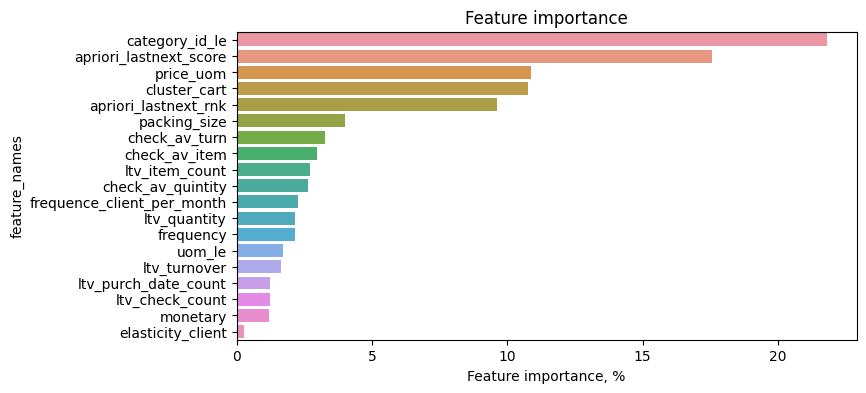

CPU times: user 9min 41s, sys: 1min 13s, total: 10min 54s
Wall time: 1min 31s


In [4]:
%%time
model_names = [
    # 'tfidf',
    # 'bm25',
    # 'cosine',
    # 'markov',
    # 'toppop',
    # 'usertoppop',
    # 'apriori',
    'apriori_lastnext',
]
predicted_item, durs, test = boosting_pipeline(k_top=50, target='item_id', model_names=model_names, test_months_global=2)

In [5]:
predicted_item.to_parquet('preds_item.par')

In [6]:
test.to_parquet('test_sessions.par')

### Best category model

Candidates generation...
Candidates sampling...
Pos and neg candidates generation...
Adding features...
Fitting boosting...
23 features
Index(['ltv_turnover', 'ltv_quantity', 'ltv_check_count',
       'ltv_purch_date_count', 'ltv_item_count', 'check_av_turn',
       'check_av_quintity', 'check_av_item', 'frequence_client_per_month',
       'monetary', 'frequency', 'elasticity_client', 'cluster_cart',
       'bm25_rnk', 'markov_rnk', 'toppop_rnk', 'usertoppop_rnk', 'apriori_rnk',
       'bm25_score', 'markov_score', 'toppop_score', 'usertoppop_score',
       'apriori_score'],
      dtype='object')
Candidates sampling 1...
Add features 1...
Predicting boosting...
bm25 metrics:
{
    "precision@01": 0.450664554176569,
    "precision@05": 0.26604172167942963,
    "precision@10": 0.2048895343719743,
    "precision@20": 0.15704383416952736,
    "recall@01": 0.031513196142105425,
    "recall@05": 0.08942740459100194,
    "recall@10": 0.13269096317783155,
    "recall@20": 0.19370235836706162,


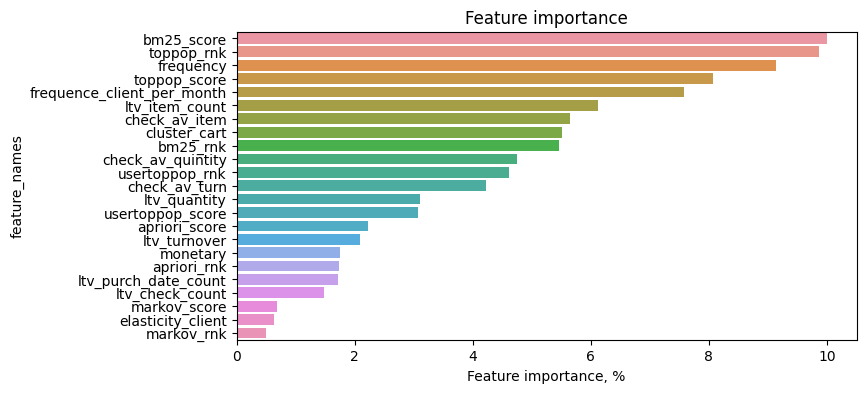

In [ ]:
%time
model_names = [
    # 'tfidf',
    'bm25',
    # 'cosine',
    'markov',
    'toppop',
    'usertoppop',
    'apriori',
    # 'apriori_lastnext',
]
predicted_cat, durs, test = boosting_pipeline(k_top=50, target='category_id', model_names=model_names, test_months_global=2)

In [ ]:
predicted_cat.to_parquet('preds_cat.par')

### Merge item and cat predictions

In [8]:
predicted_item = pd.read_parquet('preds_item.par')
predicted_cat = pd.read_parquet('../preds_cat.par')
test = pd.read_parquet('test_sessions.par')
items = pd.read_pickle('../data/transaction_and_features_2.pkl')

In [9]:
predicted_merge = merge_item_cat_preds(predicted_item, predicted_cat, test, items)
calc_merged_metrics(predicted_merge, test, items)

{
    "recall@01": 0.17914183231191846,
    "recall@05": 0.31968176023574996,
    "recall@10": 0.3942000531811852,
    "recall@20": 0.48811245717254675
}
